<a href="https://colab.research.google.com/github/nafiul-araf/Lab-work/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Loading The Data***

In [ ]:
import pandas as pd
import numpy as np
from my_custom_utils import data_preparation,important_features_visualization_classifier,feature_selection_classifier

In [ ]:
df=pd.read_csv('Copy of Depression and Happiness Factor Analysis.csv')

In [ ]:
#df.head()

In [ ]:
df.shape

(920, 21)

### ***Data Preparation***

* Preparing the data using the imported `data_preparation()` function.
```Python
    def data_preparation(data):
  """This funtion is for data preparation which returns the clean data. In order to do this, it drops the unnecessay columns and sets the index. 
  Then it encodes the categorical non-numeric data into numeric data using label encoder.
  Input:
      data: The dataframe.
  
  Output:
      Concatenation of encoded and numeric data.
  """
  data=data.drop(['Timestamp','Unnamed: 20'],axis=1)
  data=data.set_index('Which year are you in?')
  data_numeric=data.drop(data.iloc[:, [0,2,4,5,6,8,9,10,11,12,13,14,15,16]],axis=1)
  data_non_numeric=data.drop(data.iloc[:, [1,3,7,17]],axis=1)
  le=LabelEncoder()
  encode=data_non_numeric.apply(le.fit_transform)

  return pd.concat([encode,data_numeric],axis=1)
```

In [ ]:
data_final=data_preparation(df)

In [ ]:
data_final.shape

(920, 18)

### ***Feature Selection***

* Visualizing the important features using the imported `important_features_visualization_classifier()` function.
```Python
def important_features_visualization_classifier(data):
  """This function plots the importance features using mutual information classifier.
  Input:
      data: The dataframe.
  
  Output:
      Plots a horizontal bar chart of the important features in a descending order.
  """
  X=data.drop('How are you feeling right now?',axis=1)
  y=data['How are you feeling right now?']
  imp=mutual_info_classif(X,y)
  feat_imp=pd.Series(imp,data.columns[0:len(data.columns)-1])
  feat_imp.sort_values(ascending=False).plot(kind='barh',color='teal',figsize=(20,10))
  plt.show()
```

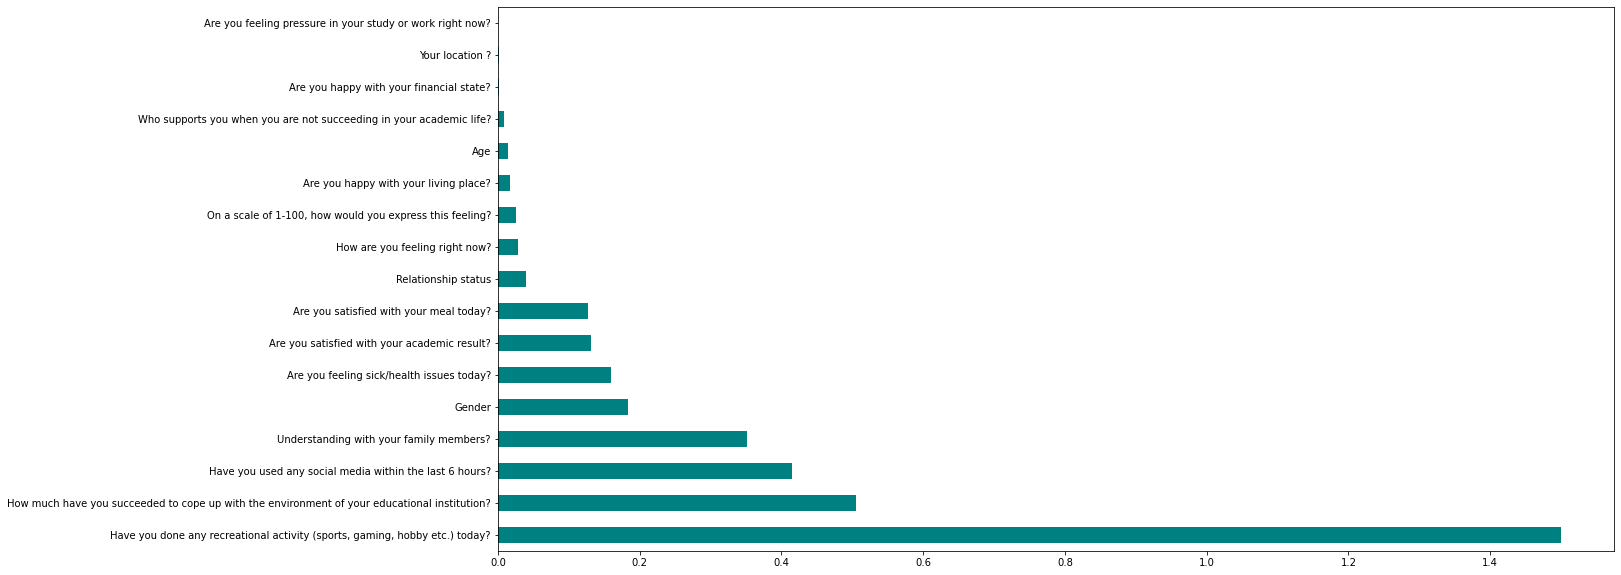

In [ ]:
imp_feat_vis=important_features_visualization_classifier(data_final)
imp_feat_vis

* Finding the important features using the imported `feature_selection_classifier()` function.
```Python
def feature_selection_classifier(data):
  """This function finds the important features using mutual information classifier under a percentile value.
  Input:
      data: The dataframe.
  
  Output:
      Returns the top important features under 30 percentiles.
  """
  X=data.drop('How are you feeling right now?',axis=1)
  y=data['How are you feeling right now?']
  select=SelectPercentile(mutual_info_classif,percentile=30)
  select.fit(X,y)

  return X.columns[select.get_support()]
```

In [ ]:
important_features=feature_selection_classifier(data_final)
important_features

Index(['Your location ?',
       'Are you feeling pressure in your study or work right now?',
       'Are you satisfied with your meal today?',
       'On a scale of 1-100, how would you express this feeling?',
       'How long did you sleep last night?(in hours)'],
      dtype='object')

### ***Models***

Here I have used:
*   Decision Tree Classifier with both 'Gini' (Default) and 'Entropy', respectively.
*   Tuning The Best Parameter with both Grid Search CV and Randomized Search CV, respectively.



In [ ]:
#data_final.head()

In [ ]:
X_new=data_final[['Your location ?','Are you feeling pressure in your study or work right now?','Are you satisfied with your meal today?','On a scale of 1-100, how would you express this feeling?','How long did you sleep last night?(in hours)']]
y_new=data_final[['How are you feeling right now?']]

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold

***Decision Tree Classifier with Gini***

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.20,stratify=y_new,random_state=21)

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt_train=dt.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_train,y_pred_dt_train)

0.9836956521739131

In [ ]:
y_pred_dt_test=dt.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_dt_test)

0.9782608695652174

In [ ]:
target_names=['Very Bad','Bad','Normal','Good','Very Good']

In [ ]:
print(confusion_matrix(y_test,y_pred_dt_test))

[[33  0  0  0  0]
 [ 0 39  0  0  0]
 [ 0  3 33  0  0]
 [ 0  0  0 33  0]
 [ 0  1  0  0 42]]


In [ ]:
print(classification_report(y_test,y_pred_dt_test,target_names=target_names))

              precision    recall  f1-score   support

    Very Bad       1.00      1.00      1.00        33
         Bad       0.91      1.00      0.95        39
      Normal       1.00      0.92      0.96        36
        Good       1.00      1.00      1.00        33
   Very Good       1.00      0.98      0.99        43

    accuracy                           0.98       184
   macro avg       0.98      0.98      0.98       184
weighted avg       0.98      0.98      0.98       184



In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

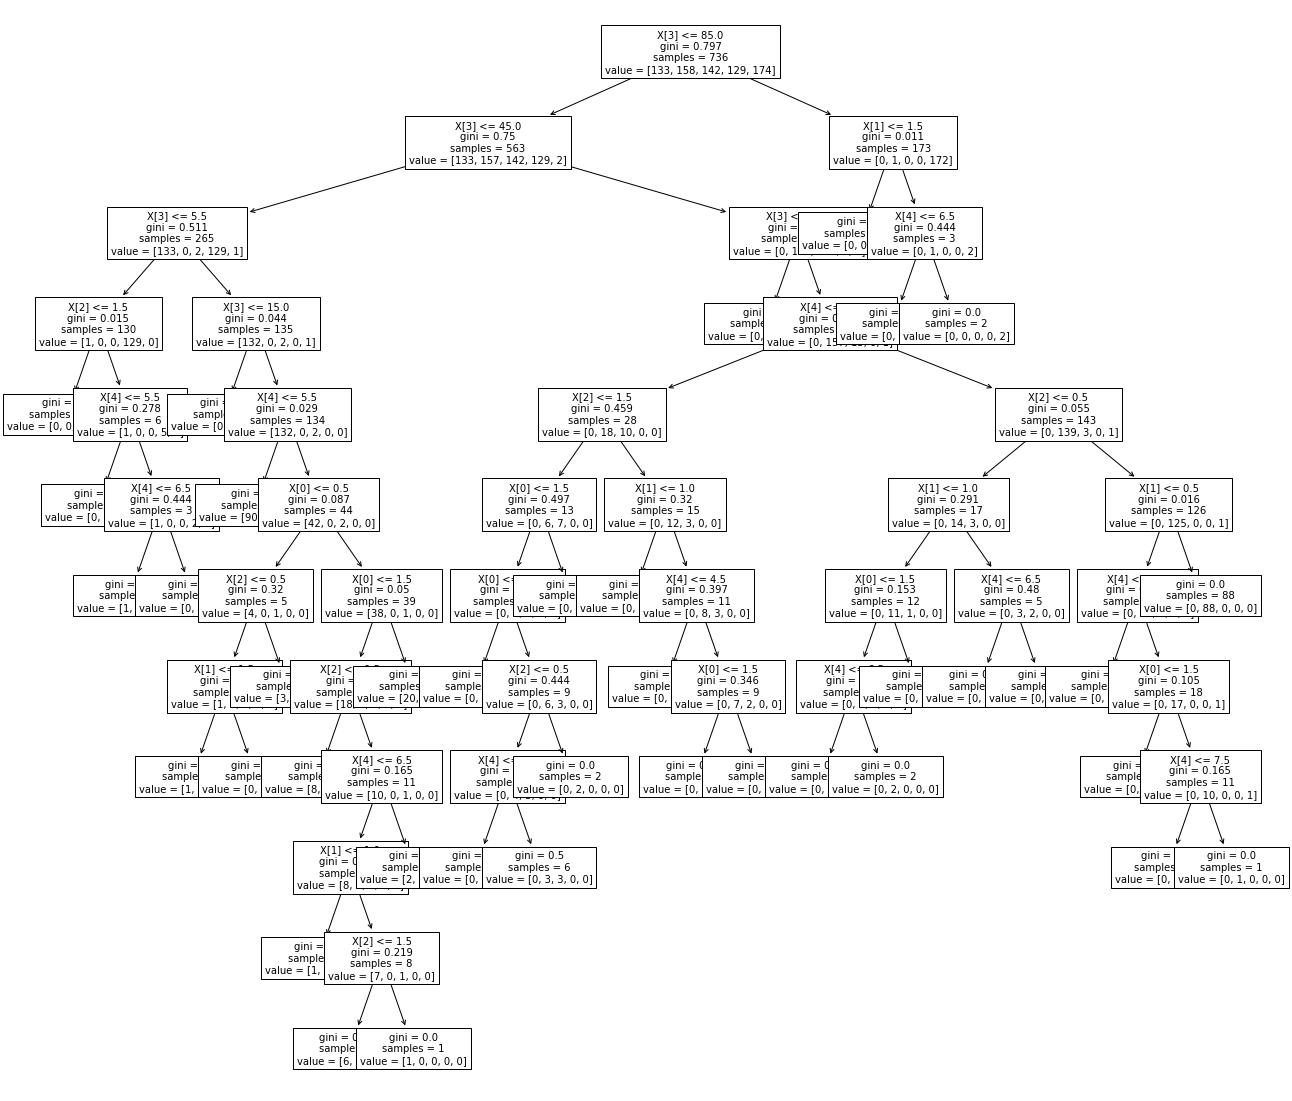

In [ ]:
fig, ax = plt.subplots(figsize=(22,20))
tree.plot_tree(dt, fontsize=10)
plt.show()

In [ ]:
target=list(df['How are you feeling right now?'].unique())
feature_names = list(X_new.columns)

In [ ]:
import pydotplus
from sklearn.tree import export_graphviz

In [ ]:
dot_data=export_graphviz(dt,filled=True,rounded=True,feature_names=feature_names,class_names=target,out_file=None,
                          special_characters=True)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)

In [ ]:
pydot_graph.set_size('"20,600!"')

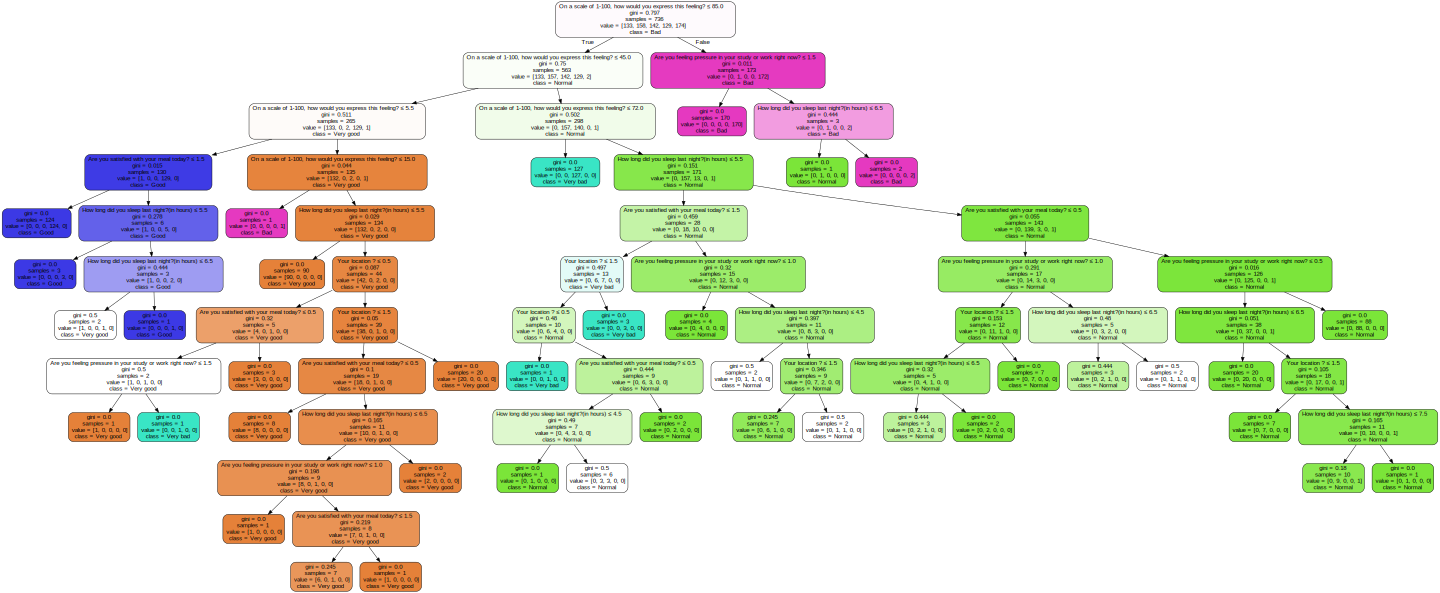

In [ ]:
import graphviz
gvz_graph=graphviz.Source(pydot_graph.to_string())
gvz_graph

In [ ]:
gvz_graph.save('ml_lab_tree.png')

'ml_lab_tree.png'

In [ ]:
print(tree.export_text(dt))

|--- feature_3 <= 85.00
|   |--- feature_3 <= 45.00
|   |   |--- feature_3 <= 5.50
|   |   |   |--- feature_2 <= 1.50
|   |   |   |   |--- class: 3
|   |   |   |--- feature_2 >  1.50
|   |   |   |   |--- feature_4 <= 5.50
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_4 >  5.50
|   |   |   |   |   |--- feature_4 <= 6.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  6.50
|   |   |   |   |   |   |--- class: 3
|   |   |--- feature_3 >  5.50
|   |   |   |--- feature_3 <= 15.00
|   |   |   |   |--- class: 4
|   |   |   |--- feature_3 >  15.00
|   |   |   |   |--- feature_4 <= 5.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  5.50
|   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_1 >  1.50
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   | 

***Decision Tree Classifier with Entropy***

In [ ]:
dt_en=DecisionTreeClassifier(criterion='entropy')

In [ ]:
dt_en.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred_dt_en_train=dt_en.predict(X_train)

In [ ]:
accuracy_score(y_train,y_pred_dt_en_train)

0.9836956521739131

In [ ]:
y_pred_dt_en_test=dt_en.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_dt_en_test)

0.9728260869565217

In [ ]:
print(confusion_matrix(y_test,y_pred_dt_en_test))

[[33  0  0  0  0]
 [ 0 39  0  0  0]
 [ 0  3 33  0  0]
 [ 0  0  0 32  1]
 [ 0  1  0  0 42]]


In [ ]:
print(classification_report(y_test,y_pred_dt_en_test,target_names=target_names))

              precision    recall  f1-score   support

    Very Bad       1.00      1.00      1.00        33
         Bad       0.91      1.00      0.95        39
      Normal       1.00      0.92      0.96        36
        Good       1.00      0.97      0.98        33
   Very Good       0.98      0.98      0.98        43

    accuracy                           0.97       184
   macro avg       0.98      0.97      0.97       184
weighted avg       0.97      0.97      0.97       184



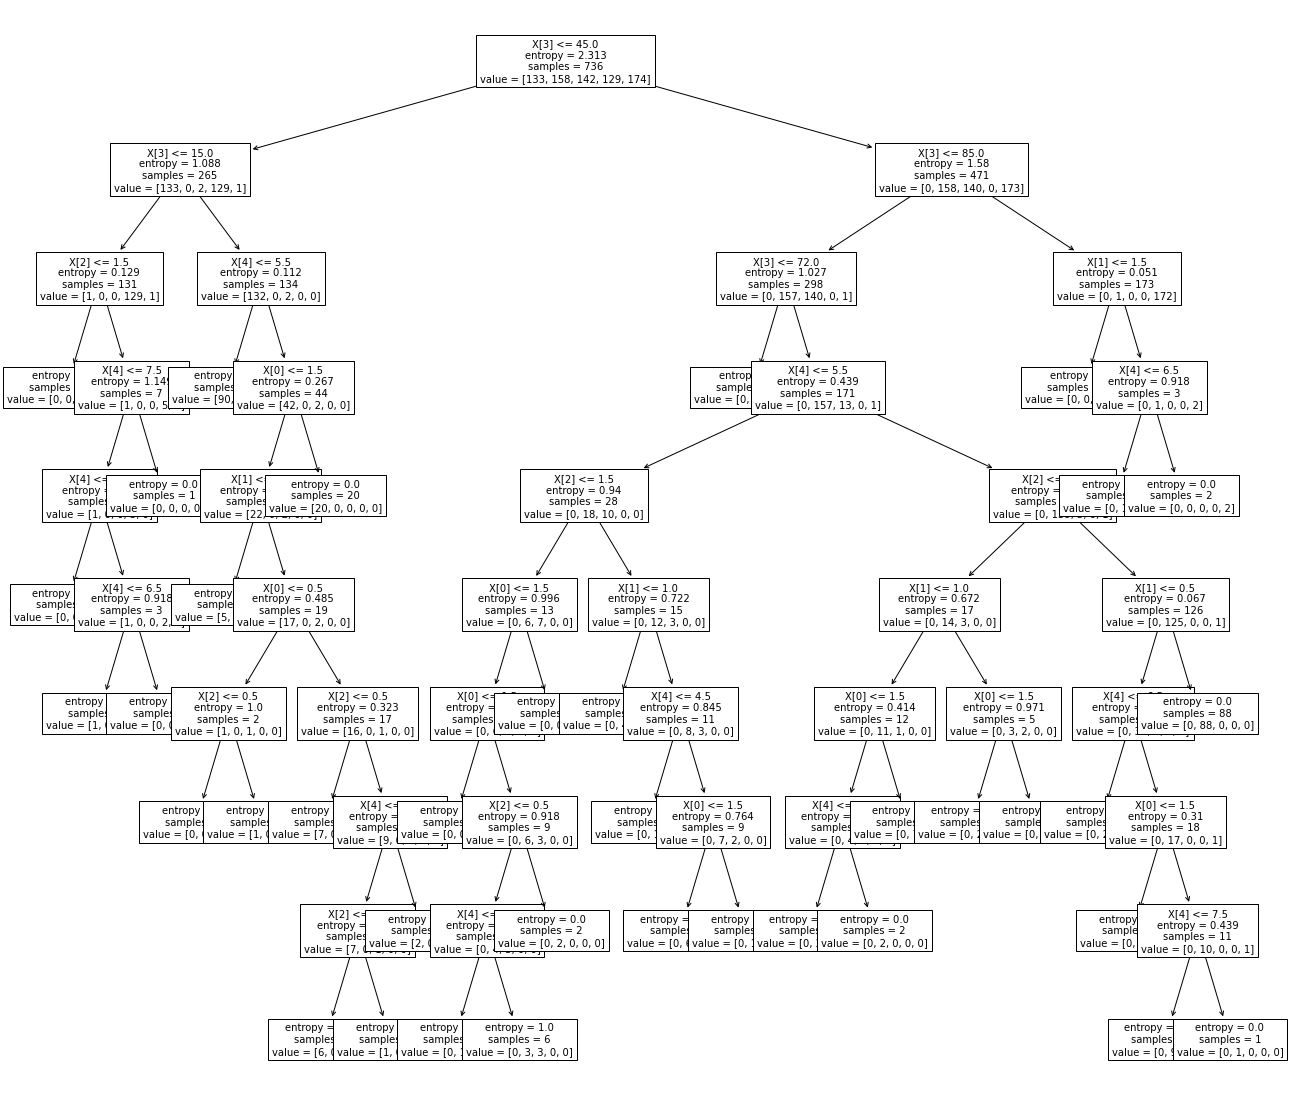

In [ ]:
fig, ax = plt.subplots(figsize=(22,20))
tree.plot_tree(dt_en, fontsize=10)
plt.show()

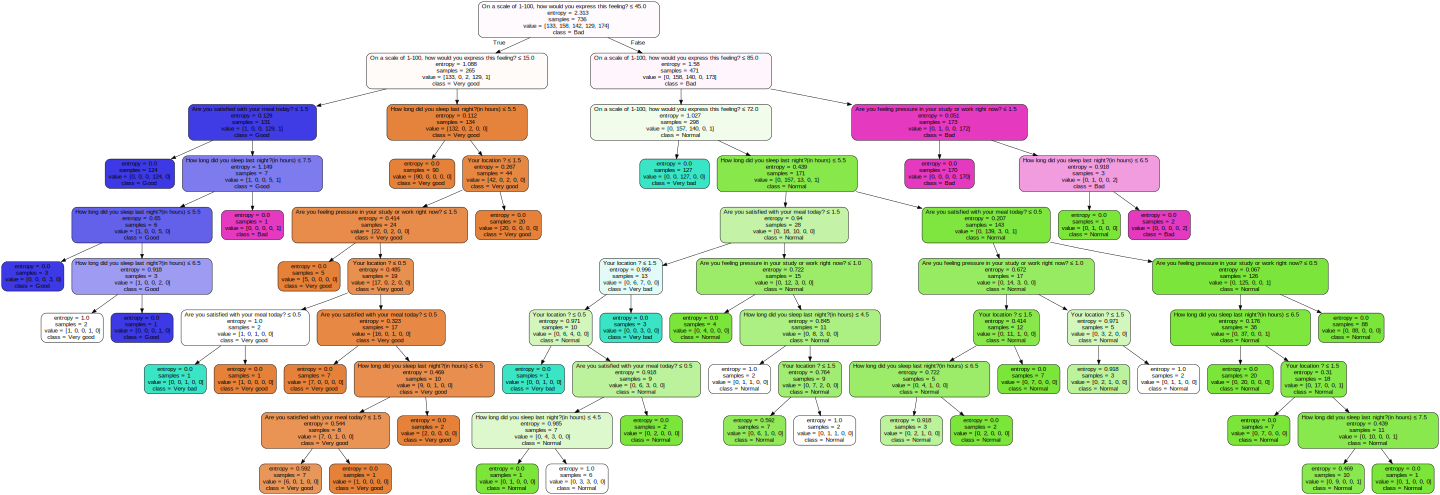

In [ ]:
dot_data_en=export_graphviz(dt_en,filled=True,rounded=True,feature_names=feature_names,class_names=target,out_file=None,
                          special_characters=True)
pydot_graph_en=pydotplus.graph_from_dot_data(dot_data_en)

pydot_graph_en.set_size('"20,600!"')
gvz_graph_en=graphviz.Source(pydot_graph_en.to_string())
gvz_graph_en

In [ ]:
print(tree.export_text(dt_en))

|--- feature_3 <= 45.00
|   |--- feature_3 <= 15.00
|   |   |--- feature_2 <= 1.50
|   |   |   |--- class: 3
|   |   |--- feature_2 >  1.50
|   |   |   |--- feature_4 <= 7.50
|   |   |   |   |--- feature_4 <= 5.50
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_4 >  5.50
|   |   |   |   |   |--- feature_4 <= 6.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  6.50
|   |   |   |   |   |   |--- class: 3
|   |   |   |--- feature_4 >  7.50
|   |   |   |   |--- class: 4
|   |--- feature_3 >  15.00
|   |   |--- feature_4 <= 5.50
|   |   |   |--- class: 0
|   |   |--- feature_4 >  5.50
|   |   |   |--- feature_0 <= 1.50
|   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  1.50
|   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |   |--- class: 0
| 

### ***Hyperparameter Tuning***

***Gridsearch CV***

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params={
    'max_depth':[5,1],
    'min_samples_leaf':[1,2],
    'criterion':['gini','entropy']
}

In [ ]:
tree_grid=DecisionTreeClassifier()

In [ ]:
grid_cv=GridSearchCV(tree_grid,params,cv=KFold(n_splits=10,shuffle=True))

In [ ]:
grid_cv.fit(X_new,y_new)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 1],
                         'min_samples_leaf': [1, 2]})

In [ ]:
print("Tuned Decision Tree Parameters: {}".format(grid_cv.best_params_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2}


In [ ]:
print("Best score is {}".format(grid_cv.best_score_))

Best score is 0.9684782608695652


***Randomizedsearch CV***

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params_random={
    'max_depth':[5,1],
    'min_samples_leaf':[1,2],
    'criterion':['gini','entropy']
}

In [ ]:
tree_random=DecisionTreeClassifier()

In [ ]:
random_cv=RandomizedSearchCV(tree_random,params_random,cv=KFold(n_splits=10,shuffle=True))

In [ ]:
random_cv.fit(X_new,y_new)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 1],
                                        'min_samples_leaf': [1, 2]})

In [ ]:
print("Tuned Decision Tree Parameters: {}".format(random_cv.best_params_))

Tuned Decision Tree Parameters: {'min_samples_leaf': 2, 'max_depth': 5, 'criterion': 'gini'}


In [ ]:
print("Best score is {}".format(random_cv.best_score_))

Best score is 0.9739130434782608


### ***Summary***

In [ ]:
print("\n All are looks almost same, no variation.\n")


 All are looks almost same, no variation.

